ROLLING xG

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches_World_Cup=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\matches_World_Cup.json')

In [4]:
events_World_Cup=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\events_World_Cup.json')

In [10]:
allshots=pd.read_csv('allshots.csv')

In [19]:
data=events_World_Cup[['id','matchId']]
data_=events_World_Cup[['id','teamId']]
data=data.set_index('id')
data_=data_.set_index('id')

In [20]:
team_dict=data_.to_dict()


In [21]:
worldcup_dict=data.to_dict()
worldcup_dict=worldcup_dict['matchId']
team_dict=team_dict['teamId']

In [22]:
worldcup_shots=allshots.loc[allshots['competition']==4]

In [24]:
matchId=[]
teamId=[]
for i in range(worldcup_shots.shape[0]):
    matchId=np.append(matchId, worldcup_dict[worldcup_shots.iloc[i]['id']])
    teamId=np.append(teamId, team_dict[worldcup_shots.iloc[i]['id']])

In [25]:
worldcup_shots['matchId']=matchId
worldcup_shots['teamId']=teamId

In [26]:
worldcup_shots['matchId']=worldcup_shots['matchId'].astype(int)
worldcup_shots['teamId']=worldcup_shots['teamId'].astype(int)

In [28]:
worldcup_shots.to_csv('worldcup_shots.csv',index=False)

In [29]:
worldcup_match = worldcup_shots.loc[worldcup_shots['matchId']==2058010]

In [30]:
france_shots=worldcup_match[worldcup_match['teamId']==4418]

In [31]:
uruguay_shots=worldcup_match[worldcup_match['teamId']==15670]

In [32]:
uruguay_shots

,playerId,id,x_coordinates,y_coordinates,blocked,goal,time,matchPeriod,counter,competition,foot,bodypart,preferrence,angles,distance,headers,xG,matchId,teamId
33707,20460,262102716,50.40,60.52,0.0,0.0,30.0,0,0.0,4,1.0,1.0,1.0,6.21,60.70,0.0,0.0005,2058010,15670
33708,116349,262102786,91.35,43.52,0.0,0.0,35.0,0,0.0,4,1.0,1.0,1.0,20.76,16.64,0.0,0.0897,2058010,15670
33710,299618,262102888,76.65,23.80,0.0,0.0,42.0,0,0.0,4,1.0,2.0,0.0,13.06,30.13,0.0,0.0166,2058010,15670
33711,20460,262102916,94.50,34.00,0.0,0.0,43.0,0,0.0,4,1.0,3.0,1.0,38.43,10.50,1.0,0.1074,2058010,15670
33712,3433,262102919,102.90,29.24,0.0,0.0,43.0,0,0.0,4,1.0,2.0,0.0,48.35,5.20,0.0,0.3910,2058010,15670
33714,361807,262103243,86.10,48.96,0.0,0.0,55.0,1,0.0,4,1.0,2.0,0.0,13.70,24.10,0.0,0.0295,2058010,15670
33715,20460,262103289,91.35,51.00,0.0,0.0,58.0,1,0.0,4,1.0,1.0,1.0,12.21,21.80,0.0,0.0400,2058010,15670
33717,70095,262103355,81.90,27.88,1.0,0.0,63.0,1,0.0,4,0.0,2.0,1.0,16.87,23.90,0.0,0.0408,2058010,15670
33718,70095,262103356,86.10,29.92,0.0,0.0,63.0,1,0.0,4,0.0,2.0,1.0,21.00,19.34,0.0,0.0724,2058010,15670


In [33]:
france_cumxG=[]
temp = 0
for i in range(france_shots.shape[0]):
    temp= temp + france_shots.iloc[i]['xG']
    france_cumxG=np.append(france_cumxG, temp)

In [34]:
france_cumxG=np.insert(france_cumxG, 0 , 0)
france_cumxG=np.append(france_cumxG,france_cumxG[len(france_cumxG)-1])

In [35]:
france_time = france_shots.time
france_time=np.array(france_time)
france_time=np.insert(france_time,0,0)
france_time = np.append(france_time,90)



In [36]:
uruguay_cumxG=[]
temp = 0
for i in range(uruguay_shots.shape[0]):
    temp= temp + uruguay_shots.iloc[i]['xG']
    uruguay_cumxG=np.append(uruguay_cumxG, temp)
uruguay_cumxG=np.insert(uruguay_cumxG, 0 , 0)
uruguay_cumxG=np.append(uruguay_cumxG,uruguay_cumxG[len(uruguay_cumxG)-1])

In [37]:
uruguay_time = uruguay_shots.time
uruguay_time=np.array(uruguay_time)
uruguay_time=np.insert(uruguay_time,0,0)
uruguay_time = np.append(uruguay_time,90)


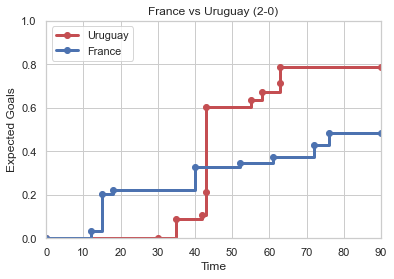

In [38]:
sns.set(style='whitegrid')
plt.plot(uruguay_time,uruguay_cumxG, drawstyle='steps-post', color='r', linewidth=3, label='Uruguay', marker='o')
plt.plot(france_time,france_cumxG, drawstyle='steps-post', color='b',linewidth=3, label='France', marker='o')
plt.xlim(0,90)
plt.ylim(0,1)
plt.ylabel('Expected Goals')
plt.xlabel('Time')
plt.title('France vs Uruguay (2-0)')
plt.legend(loc='upper left')

In [39]:
def getrollingxGdata(shots_data):
    cum_xG=[]
    temp = 0
    for i in range(shots_data.shape[0]):
        temp= temp + shots_data.iloc[i]['xG']
        cum_xG=np.append(cum_xG, temp)
    cum_xG=np.insert(cum_xG, 0 , 0)
    cum_xG=np.append(cum_xG,cum_xG[len(cum_xG)-1])
    time = shots_data.time
    time=np.array(time)
    time=np.insert(time,0,0)
    time = np.append(time,90)
    return cum_xG, time

In [43]:
worldcup_shots=pd.read_csv('worldcup_shots.csv')

In [44]:
worldcup_final=worldcup_shots.loc[worldcup_shots['matchId']==2058017]

In [45]:
worldcup_final_france = worldcup_final.loc[worldcup_final['teamId']==4418]
worldcup_final_croatia = worldcup_final.loc[worldcup_final['teamId']==9598]

In [46]:
worldcup_final_croatia['x_coordinates'] = 105-worldcup_final_croatia['x_coordinates']

In [47]:
france_final_xG, france_final_time = getrollingxGdata(worldcup_final_france)

In [48]:
croatia_final_xG, croatia_final_time = getrollingxGdata(worldcup_final_croatia)

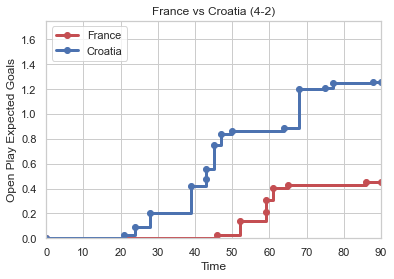

In [49]:
sns.set(style='whitegrid')
plt.plot(france_final_time,france_final_xG, drawstyle='steps-post', color='r', linewidth=3, label='France', marker='o')
plt.plot(croatia_final_time,croatia_final_xG, drawstyle='steps-post', color='b',linewidth=3, label='Croatia', marker='o')
plt.xlim(0,90)
plt.ylim(0,1.75)
plt.ylabel('Open Play Expected Goals')
plt.xlabel('Time')
plt.title('France vs Croatia (4-2)')
plt.legend(loc='upper left')